# Time Series Analysis and Forecasting of Sales Data
---
**Introduction**

Welcome to the sales forecasting project for furniture and office supplies! In this notebook, I will explore and analyze historical sales data for furniture and office supplies, and then build forecasting models using time series forecasting library, Prophet. The goal of this project is to predict the future sales trends for furniture, office supplies and technology sales over the next 3 years.

I will start by loading and pre-processing the sales data, perform exploratory data analysis to understand the underlying patterns, and then build separate Prophet models for furniture, office supplies and technology sales. I will evaluate the performance of these models using various metrics, and finally, compare the forecasted sales trends for both product categories.

Let's get started and dive into the exciting world of sales forecasting!

---
**skills used in this project:**

1. Data Wrangling: The project began by loading and reading data from Excel files using the pandas library. Data cleaning techniques were then applied, such as dropping unnecessary columns, sorting data, grouping by date, and resampling to obtain monthly mean sales data.

2. Time Series Forecasting: Facebook Prophet, a powerful time series forecasting library, was used to build separate models for each category (furniture, office supplies, and technology sales). Prophet effectively handles trend, seasonality, and holidays in time series data.

3. Data Visualization: The matplotlib library was utilized to create visualizations of the forecasted sales for each category. The forecasted values were plotted alongside the actual sales data to provide a clear view of the model's performance.

4. Interpretation: The forecasted results were interpreted, focusing on key insights such as the trend, seasonality, and uncertainty intervals (yhat_lower and yhat_upper).

5. Integration: The forecasted results were integrated into a single plot with subplots for each category. This comprehensive visualization allowed for a straightforward comparison of forecasted sales for furniture, office supplies, and technology products.

In [1]:
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import itertools
plt.style.use('fivethirtyeight')
from itertools import product
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Exploring Data

### Read dataset file

In [2]:
df = pd.read_excel('sample_-_superstore.xls')


In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

The Pandas DataFrame with 9994 rows and 21 columns. Here is a breakdown of the columns:

1. Row ID: A unique identifier for each row.
2. Order ID: Identifier for each order.
3. Order Date: Date of the order, stored as a datetime object.
4. Ship Date: Date of shipment, stored as a datetime object.
5. Ship Mode: Mode of shipment (e.g., standard, express).
6. Customer ID: Identifier for each customer.
7. Customer Name: Name of the customer.
8. Segment: Customer segment (e.g., corporate, home office).
9. Country: Country where the order was placed.
10. City: City where the order was placed.
11. State: State where the order was placed.
12. Postal Code: Postal code of the location.
13. Region: Geographical region (e.g., East, West, North, South).
14. Product ID: Identifier for each product.
15. Category: Category of the product (e.g., furniture, technology).
16. Sub-Category: Sub-category of the product (e.g., chairs, phones).
17. Product Name: Name of the product.
18. Sales: Sales revenue associated with the order.
19. Quantity: Number of products ordered.
20. Discount: Discount applied to the order.
21. Profit: Profit earned from the order.

The data is related to sales and order information, with various attributes for each order and its products. The DataFrame includes a mix of different data types, such as integers, floats, objects (strings), and datetime objects.



### Check null values

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No null values

The plot shows the average monthly furniture sales from 2014 to 2017. We can see that at the beginning of each year, the sales start low and then increase over the following months. Towards the end of 2014, there was a significant increase in sales. However, in 2016 and 2017, the sales showed fluctuations, going up and down. This indicates an unstable trend, where sales are not consistently increasing or decreasing. Despite the fluctuations, there seems to be a repeating pattern in the sales data.

In the seasonal plot, we can observe a recurring pattern where sales tend to decrease in January and increase in July. This cyclic behavior suggests that there might be some seasonal trend influencing the sales data, with low points typically occurring during January and high points during July.

---
## Office Supplies Sales Trends over Time

In [6]:
Office = df.loc[df['Category'] == 'Office Supplies']
Office


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [7]:
Office['Order Date'].min(), Office['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Drop columns

In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 
        'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
Office.drop(cols, axis=1, inplace=True)
Office_sort = Office.sort_values('Order Date')
Office_sort.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
Office_sort

,Order Date,Sales
7980,2014-01-03,16.448
740,2014-01-04,272.736
739,2014-01-04,11.784
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
1297,2017-12-30,20.720
908,2017-12-30,52.776
1296,2017-12-30,13.904


### Grouping Office Supplies  Sales Data by Order Date

In [10]:
Office_sort_grouped = Office_sort.groupby('Order Date')['Sales'].sum().reset_index()

Office_sort_grouped

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


### Setting 'Order Date' as the Time Index for office  Sales Data"

---
Set the 'Order Date' column as the time index for the DataFrame to enable time-based analysis and manipulation.

In [11]:
office_index_time = Office_sort_grouped.set_index('Order Date')
office_index_time.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [12]:
# Perform time series resampling to get the monthly mean of 'Sales'
year_office = office_index_time['Sales'].resample('MS').mean()
year_office

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

In [13]:
year_office['2015']

Order Date
2015-01-01    129.198571
2015-02-01    335.504188
2015-03-01    690.545522
2015-04-01    502.342320
2015-05-01    364.549440
2015-06-01    560.407737
2015-07-01    205.214739
2015-08-01    558.814667
2015-09-01    772.230680
2015-10-01    361.392083
2015-11-01    757.790357
2015-12-01    540.055800
Freq: MS, Name: Sales, dtype: float64

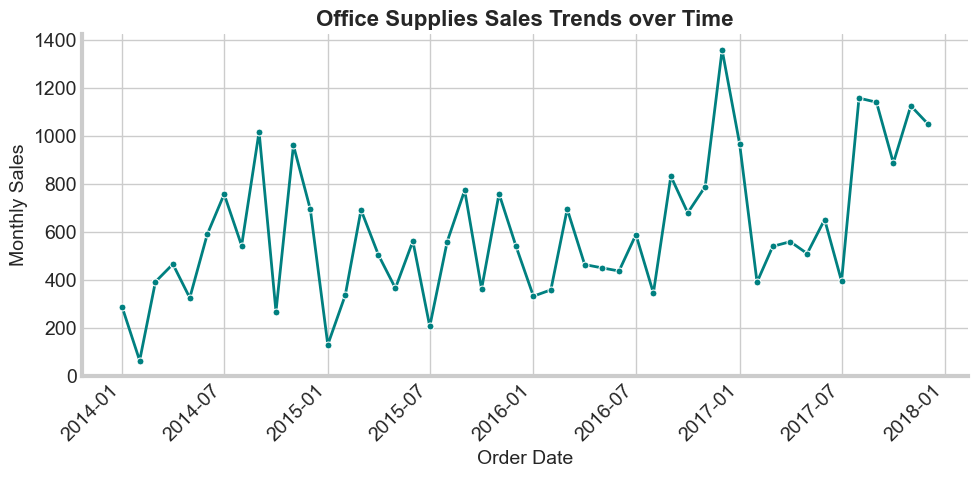

In [14]:
# Set the style for the plot
sns.set_style('whitegrid')

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=year_office, marker='o', markersize=5, color='teal', linewidth=2)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.title('Office Supplies Sales Trends over Time', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right') 

# Adding a white background color for the plot
plt.gca().set_facecolor('white')

# Remove top and right spines
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

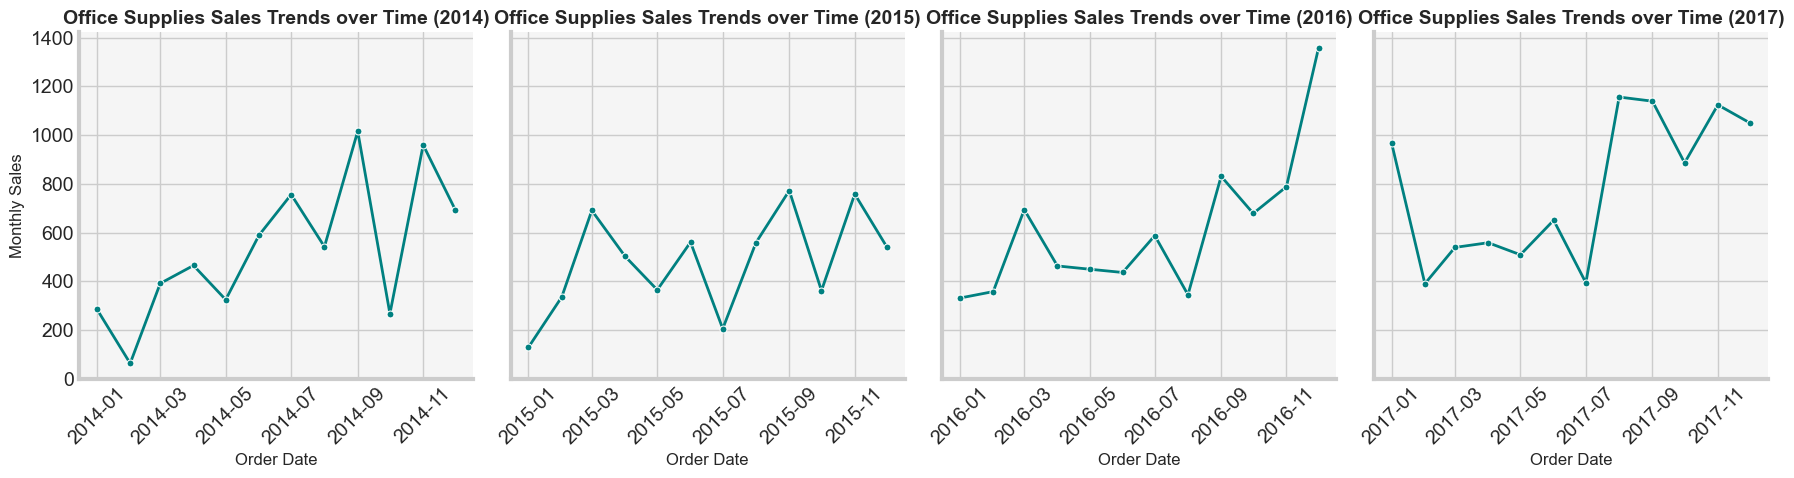

In [15]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

# Create the line plot for 2014
sns.lineplot(data=year_office['2014'], marker='o', markersize=5, color='teal', linewidth=2, ax=axes[0])
axes[0].set_xlabel('Order Date', fontsize=12)
axes[0].set_ylabel('Monthly Sales', fontsize=12)
axes[0].set_title('Office Supplies Sales Trends over Time (2014)', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[0].grid(True)
axes[0].set_facecolor('#f5f5f5')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create the line plot for 2015
sns.lineplot(data=year_office['2015'], marker='o', markersize=5, color='teal', linewidth=2, ax=axes[1])
axes[1].set_xlabel('Order Date', fontsize=12)
axes[1].set_title('Office Supplies Sales Trends over Time (2015)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[1].grid(True)
axes[1].set_facecolor('#f5f5f5')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Create the line plot for 2016
sns.lineplot(data=year_office['2016'], marker='o', markersize=5, color='teal', linewidth=2, ax=axes[2])
axes[2].set_xlabel('Order Date', fontsize=12)
axes[2].set_title('Office Supplies Sales Trends over Time (2016)', fontsize=14, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[2].grid(True)
axes[2].set_facecolor('#f5f5f5')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Create the line plot for 2017
sns.lineplot(data=year_office['2017'], marker='o', markersize=5, color='teal', linewidth=2, ax=axes[3])
axes[3].set_xlabel('Order Date', fontsize=12)
axes[3].set_title('Office Supplies Sales Trends over Time (2017)', fontsize=14, fontweight='bold')
axes[3].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[3].grid(True)
axes[3].set_facecolor('#f5f5f5')
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()


### Seasonal decomposition 

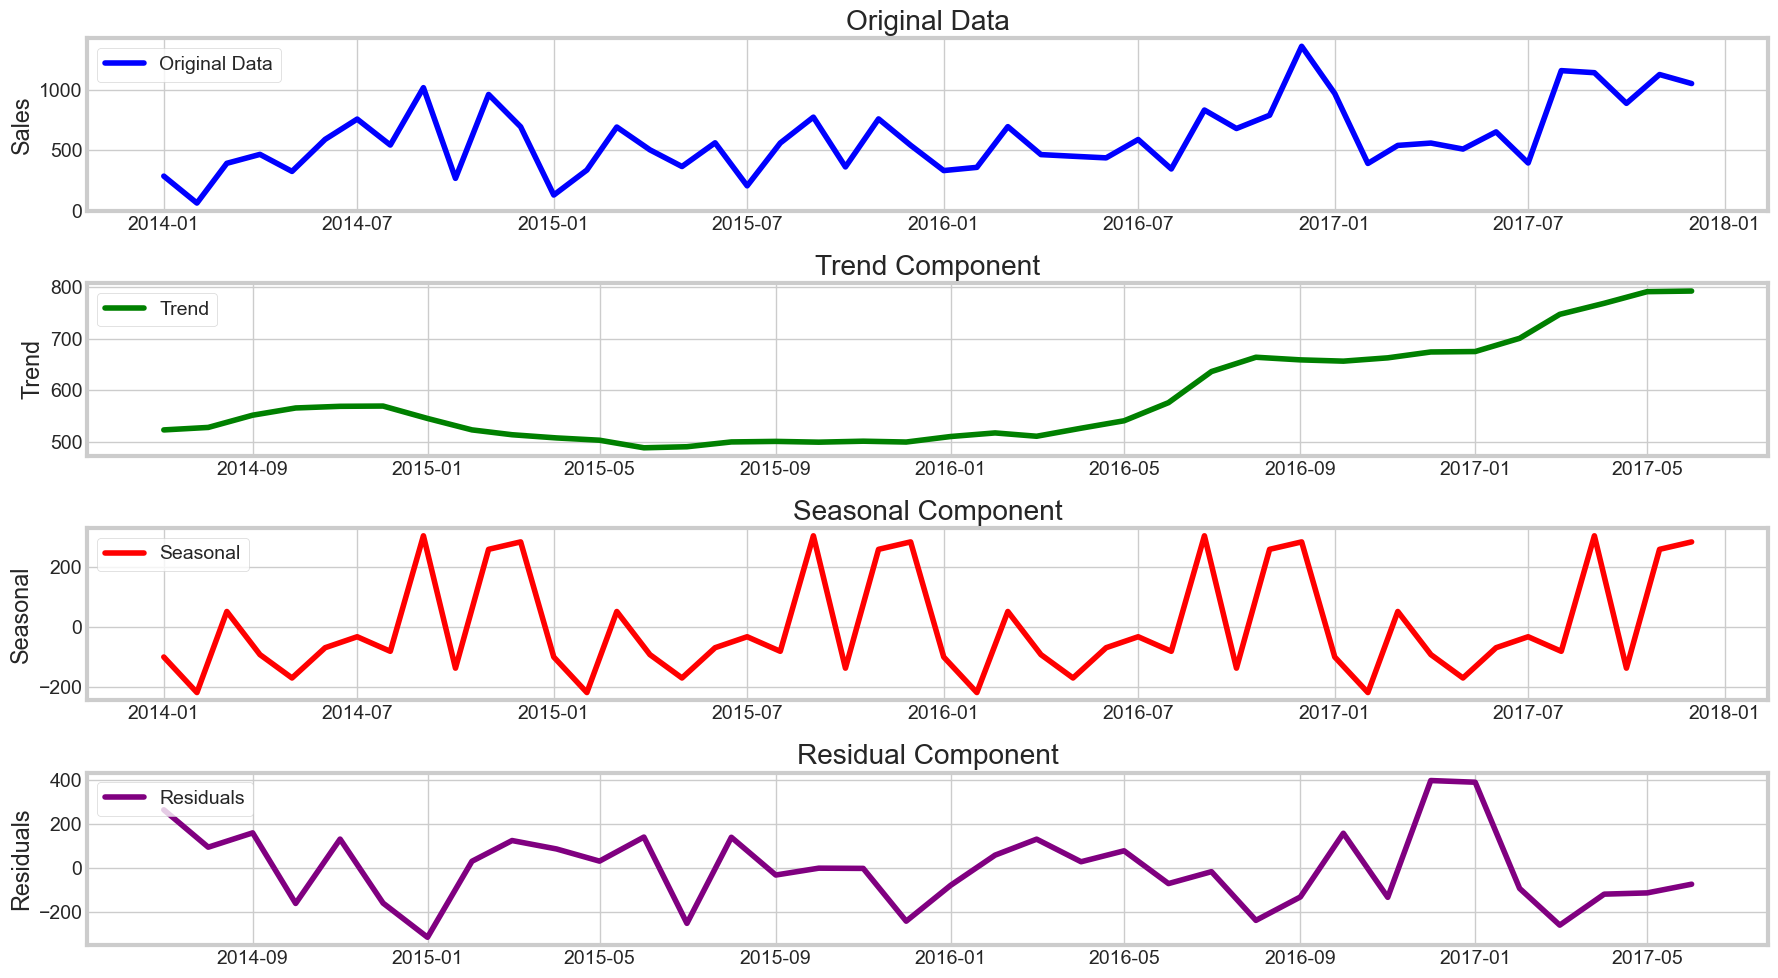

In [16]:
# Set the figure size
plt.figure(figsize=(18, 10))

# Perform seasonal decomposition using the 'additive' model
decomposition_office = sm.tsa.seasonal_decompose(year_office, model='additive')

# Plot the decomposed components
plt.subplot(4, 1, 1)
plt.plot(year_office, label='Original Data', color='blue')
plt.legend(loc='upper left')
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition_office.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition_office.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition_office.resid, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.ylabel('Residuals')
plt.title('Residual Component')

# Adjust layout and display the plot
plt.tight_layout()
plt.show() 

In the seasonal plot, we can observe a recurring pattern where sales tend to decrease in January and increase in July. This cyclic behavior suggests that there might be some seasonal trend influencing the sales data, with low points typically occurring during January and high points during July.

---
## Furniture Sales Trends over Time

In [17]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [18]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [19]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Drop Columns

In [20]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 
        'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture_sort = furniture.sort_values('Order Date')
furniture_sort.isnull().sum()

Order Date    0
Sales         0
dtype: int64

### Grouping Furniture  Sales Data by Order Date

In [21]:
furniture_sort_grouped = furniture.groupby('Order Date')['Sales'].sum().reset_index()

furniture_sort_grouped


,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


### Setting 'Order Date' as the Time Index for furniture  Sales Data"

---
Set the 'Order Date' column as the time index for the DataFrame to enable time-based analysis and manipulation.

In [22]:
furniture_index_time = furniture_sort_grouped.set_index('Order Date')
furniture_index_time.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

### Perform time series resampling to get the monthly mean of 'Sales'

In [23]:
year_furniture = furniture_index_time['Sales'].resample('MS').mean()
year_furniture.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

In [24]:
year_furniture['2015']

Order Date
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
Freq: MS, Name: Sales, dtype: float64

### Visualizing Furniture Sales Trends over Time 

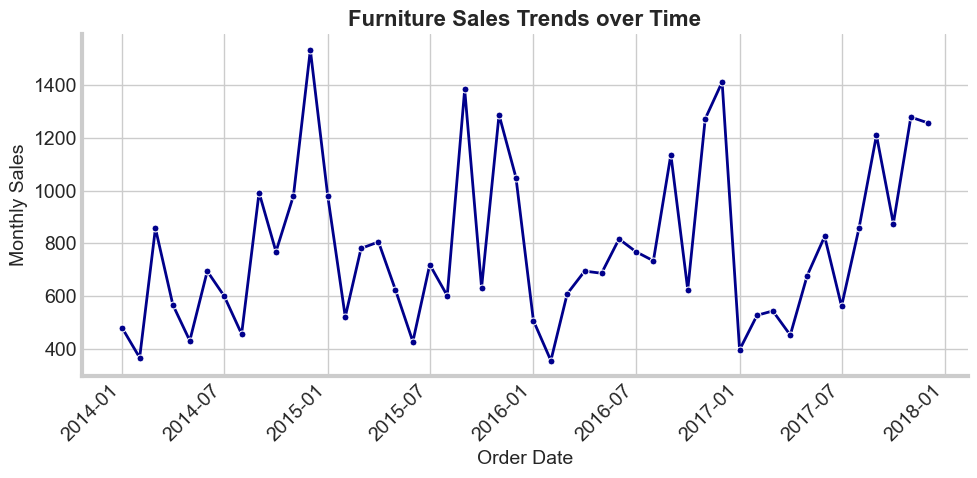

In [25]:
# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=year_furniture, marker='o', markersize=5, color='#00008B', linewidth=2)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.title('Furniture Sales Trends over Time', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right') 

# Remove top and right spines
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

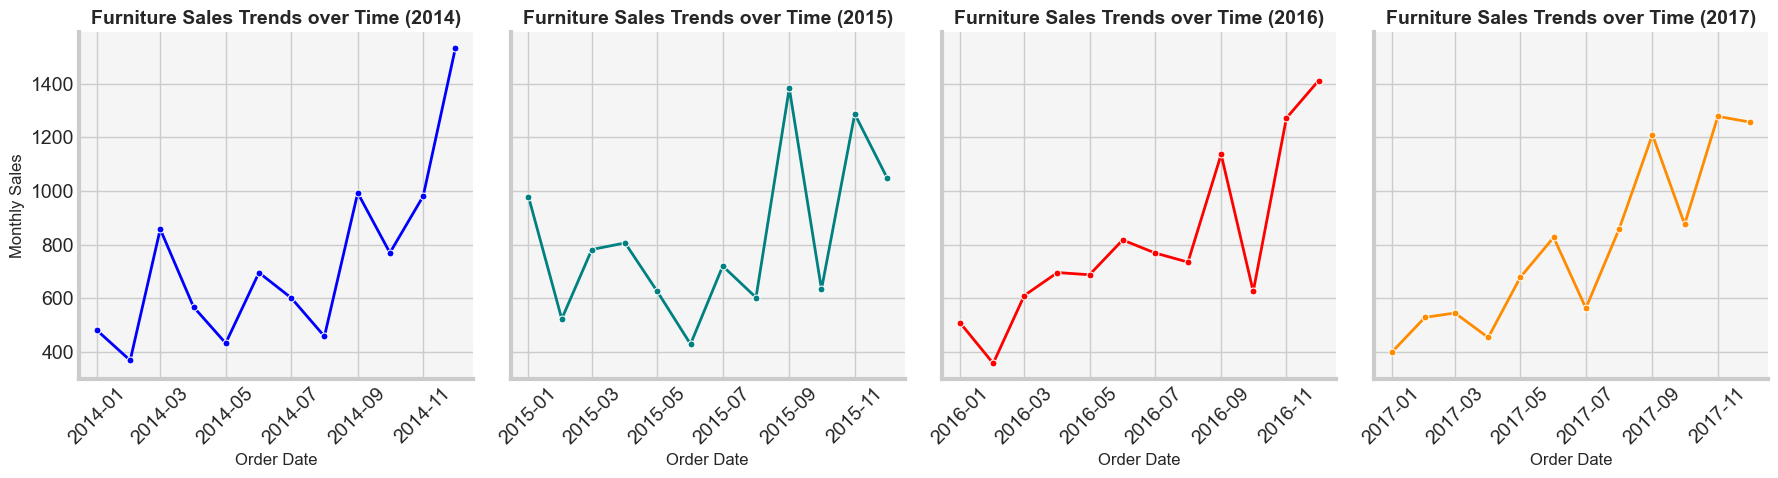

In [26]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

# Create the line plot for 2014
sns.lineplot(data=year_furniture['2014'], marker='o', markersize=5, color='Blue', linewidth=2, ax=axes[0])
axes[0].set_xlabel('Order Date', fontsize=12)
axes[0].set_ylabel('Monthly Sales', fontsize=12)
axes[0].set_title('Furniture Sales Trends over Time (2014)', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[0].grid(True)
axes[0].set_facecolor('#f5f5f5')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create the line plot for 2015
sns.lineplot(data=year_furniture['2015'], marker='o', markersize=5, color='teal', linewidth=2, ax=axes[1])
axes[1].set_xlabel('Order Date', fontsize=12)
axes[1].set_title('Furniture Sales Trends over Time (2015)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[1].grid(True)
axes[1].set_facecolor('#f5f5f5')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Create the line plot for 2016
sns.lineplot(data=year_furniture['2016'], marker='o', markersize=5, color='red', linewidth=2, ax=axes[2])
axes[2].set_xlabel('Order Date', fontsize=12)
axes[2].set_title('Furniture Sales Trends over Time (2016)', fontsize=14, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[2].grid(True)
axes[2].set_facecolor('#f5f5f5')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Create the line plot for 2017
sns.lineplot(data=year_furniture['2017'], marker='o', markersize=5, color='darkorange', linewidth=2, ax=axes[3])
axes[3].set_xlabel('Order Date', fontsize=12)
axes[3].set_title('Furniture Sales Trends over Time (2017)', fontsize=14, fontweight='bold')
axes[3].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[3].grid(True)
axes[3].set_facecolor('#f5f5f5')
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()


### Seasonal decomposition 

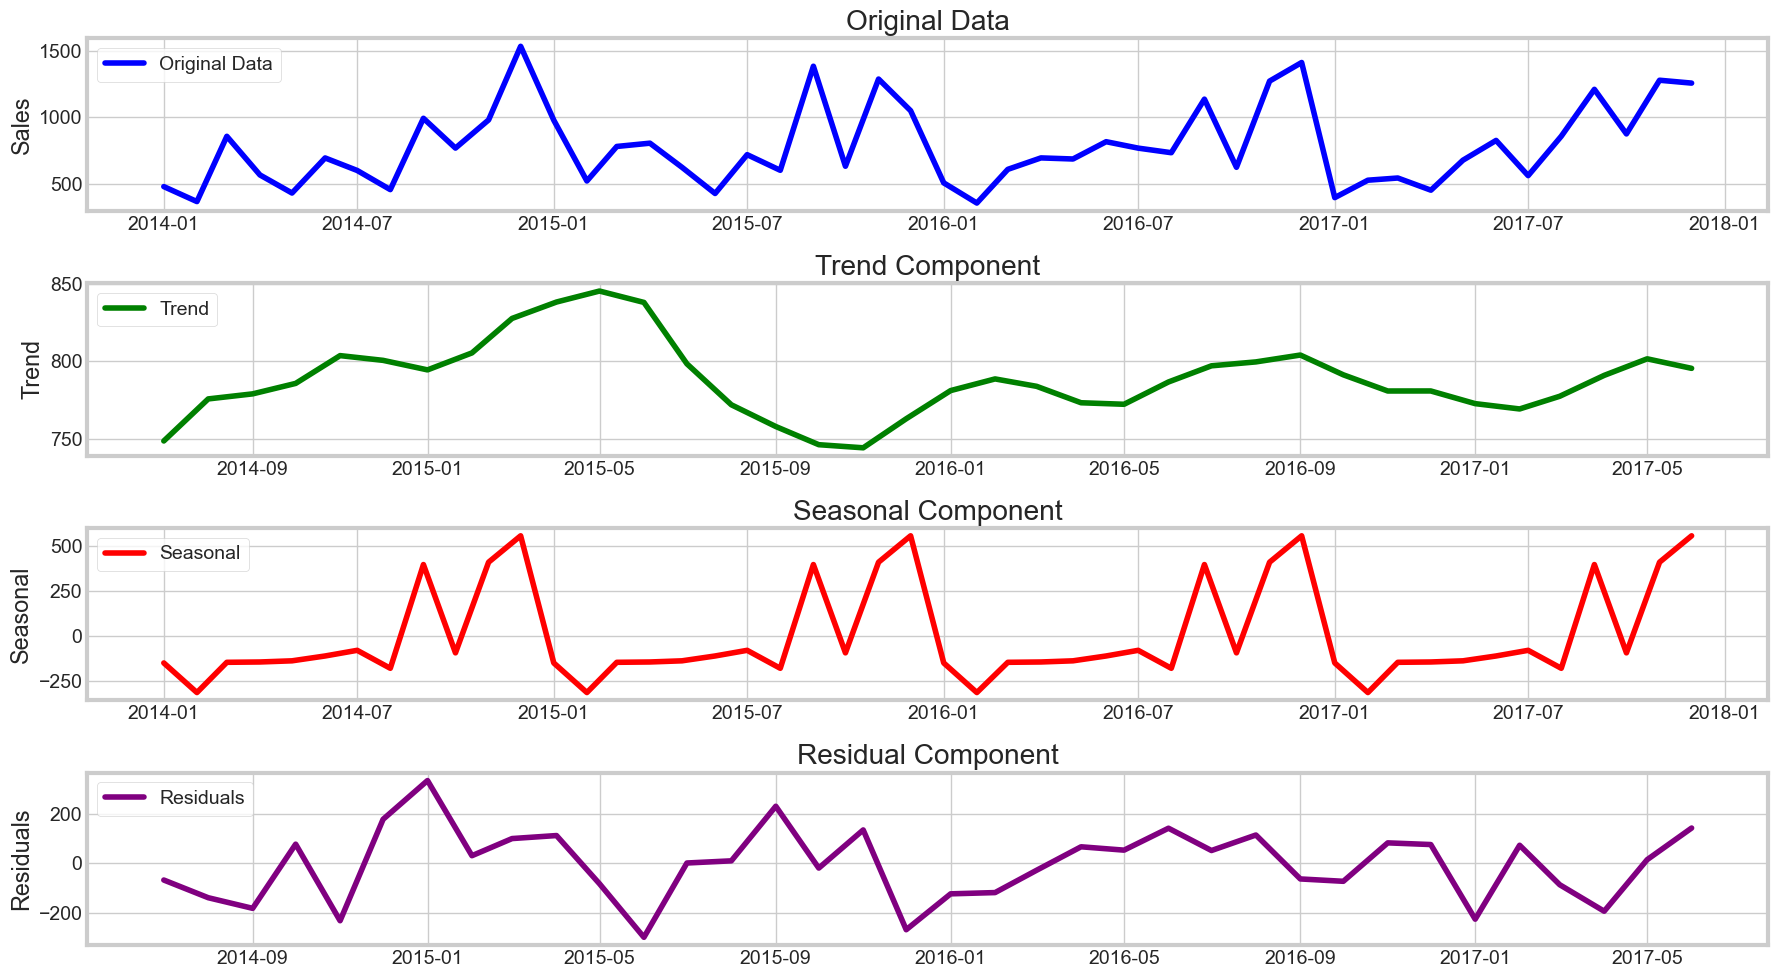

In [27]:
# Set the figure size
plt.figure(figsize=(18, 10))

# Perform seasonal decomposition using the 'additive' model
decomposition_furninture = sm.tsa.seasonal_decompose(year_furniture, model='additive')

# Plot the decomposed components
plt.subplot(4, 1, 1)
plt.plot(year_furniture, label='Original Data', color='blue')
plt.legend(loc='upper left')
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition_furninture.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition_furninture.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition_furninture.resid, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.ylabel('Residuals')
plt.title('Residual Component')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

---
## Technology Sales Trends over Time

In [28]:
technology = df.loc[df['Category'] == 'Technology']
technology


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [29]:
technology['Order Date'].min(), technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Drop Columns

In [30]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 
        'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
tech_sort = technology.sort_values('Order Date')
tech_sort.isnull().sum()

Order Date    0
Sales         0
dtype: int64

### Grouping Technology  Sales Data by Order Date

In [31]:
tech_sort_grouped = technology.groupby('Order Date')['Sales'].sum().reset_index()

tech_sort_grouped

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-09,31.200
2,2014-01-13,646.740
3,2014-01-15,149.950
4,2014-01-16,124.200
...,...,...
819,2017-12-25,401.208
820,2017-12-27,164.388
821,2017-12-28,14.850
822,2017-12-29,302.376


### Setting 'Order Date' as the Time Index for technology  Sales Data"

---
Set the 'Order Date' column as the time index for the DataFrame to enable time-based analysis and manipulation.

In [32]:
tech_index_time = tech_sort_grouped.set_index('Order Date')
tech_index_time.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

### Perform time series resampling to get the monthly mean of 'Sales'

In [33]:
year_technology = tech_index_time['Sales'].resample('MS').mean()
year_technology.head()

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
Freq: MS, Name: Sales, dtype: float64

### Visualizing Technology Sales Trends over Time 

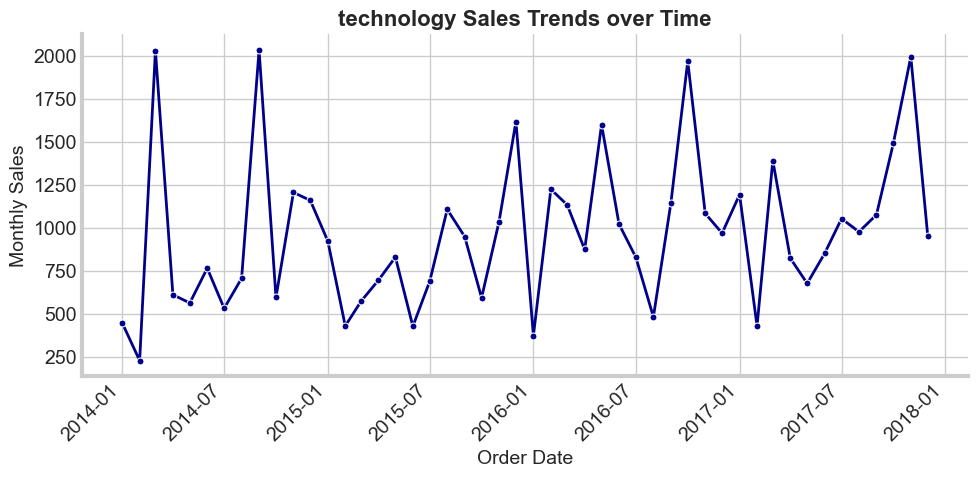

In [34]:
# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=year_technology, marker='o', markersize=5, color='#00008B', linewidth=2)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.title('technology Sales Trends over Time', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right') 

# Remove top and right spines
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

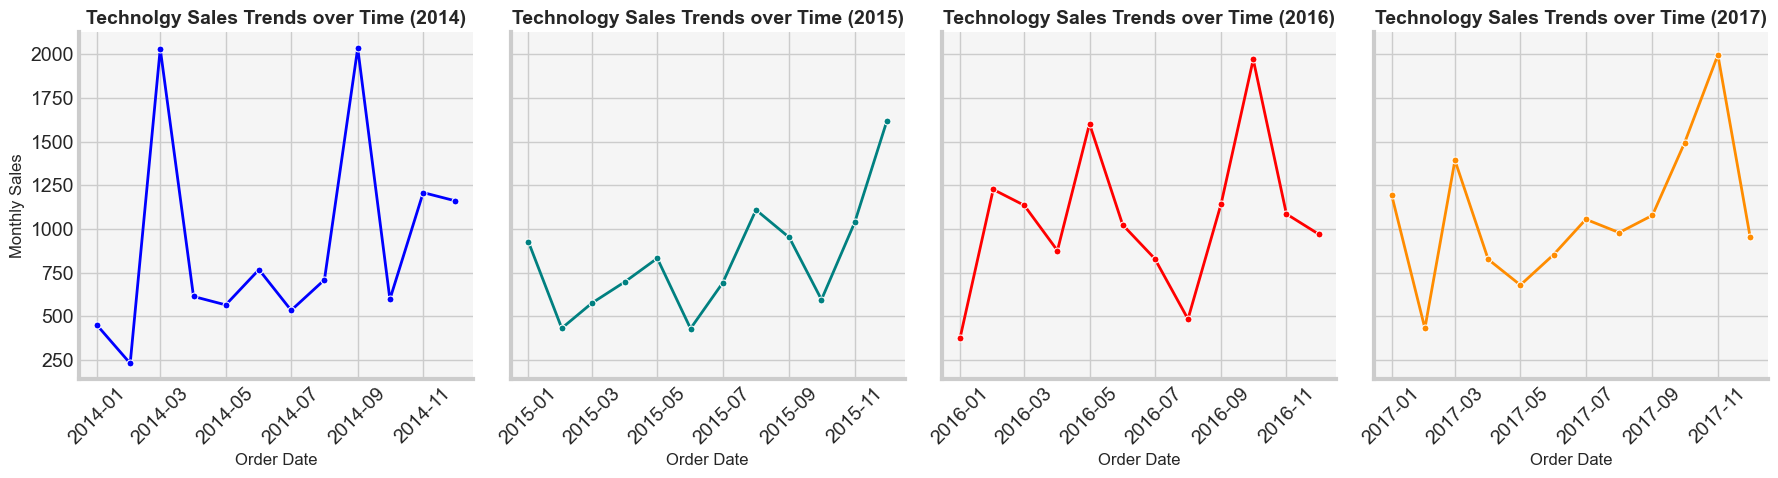

In [35]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

# Create the line plot for 2014
sns.lineplot(data=year_technology['2014'], marker='o', markersize=5, color='Blue', linewidth=2, ax=axes[0])
axes[0].set_xlabel('Order Date', fontsize=12)
axes[0].set_ylabel('Monthly Sales', fontsize=12)
axes[0].set_title('Technolgy Sales Trends over Time (2014)', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[0].grid(True)
axes[0].set_facecolor('#f5f5f5')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Create the line plot for 2015
sns.lineplot(data=year_technology['2015'], marker='o', markersize=5, color='teal', linewidth=2, ax=axes[1])
axes[1].set_xlabel('Order Date', fontsize=12)
axes[1].set_title('Technology Sales Trends over Time (2015)', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[1].grid(True)
axes[1].set_facecolor('#f5f5f5')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Create the line plot for 2016
sns.lineplot(data=year_technology['2016'], marker='o', markersize=5, color='red', linewidth=2, ax=axes[2])
axes[2].set_xlabel('Order Date', fontsize=12)
axes[2].set_title('Technology Sales Trends over Time (2016)', fontsize=14, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[2].grid(True)
axes[2].set_facecolor('#f5f5f5')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

# Create the line plot for 2017
sns.lineplot(data=year_technology['2017'], marker='o', markersize=5, color='darkorange', linewidth=2, ax=axes[3])
axes[3].set_xlabel('Order Date', fontsize=12)
axes[3].set_title('Technology Sales Trends over Time (2017)', fontsize=14, fontweight='bold')
axes[3].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[3].grid(True)
axes[3].set_facecolor('#f5f5f5')
axes[3].spines['top'].set_visible(False)
axes[3].spines['right'].set_visible(False)

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()


### Seasonal Decomposition 

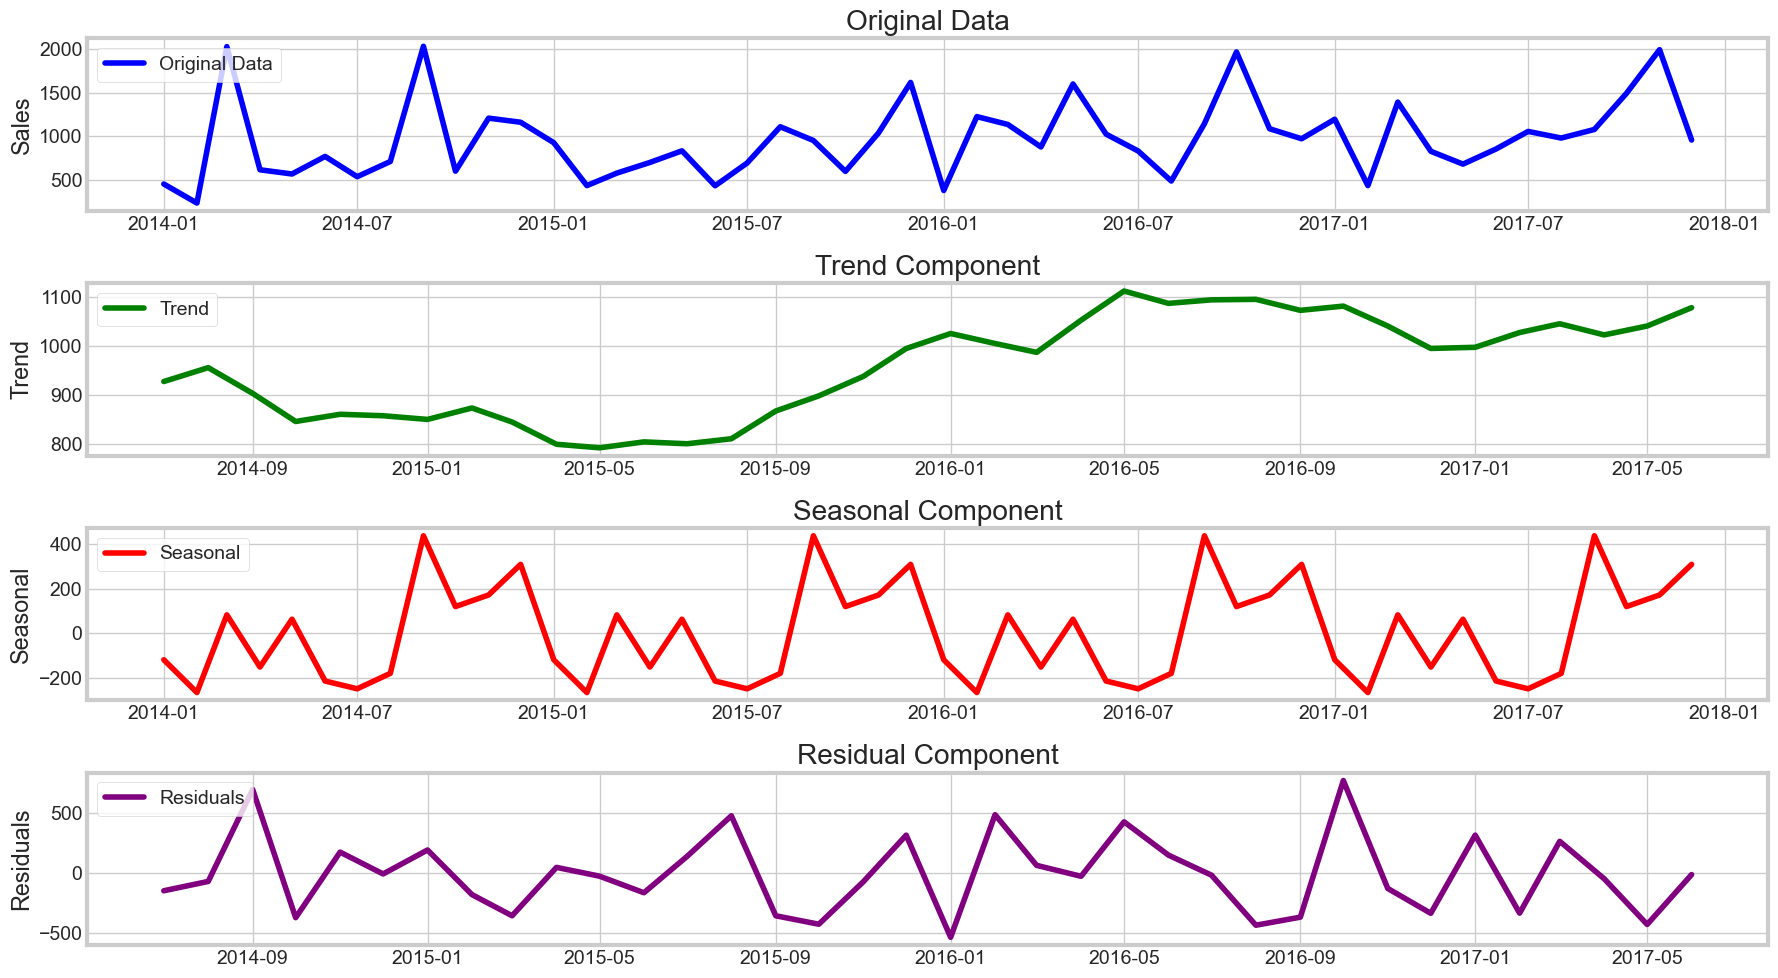

In [36]:
# Set the figure size
plt.figure(figsize=(18, 10))

# Perform seasonal decomposition using the 'additive' model
decomposition_tech = sm.tsa.seasonal_decompose(year_technology, model='additive')

# Plot the decomposed components
plt.subplot(4, 1, 1)
plt.plot(year_technology, label='Original Data', color='blue')
plt.legend(loc='upper left')
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition_tech.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition_tech.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition_tech.resid, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.ylabel('Residuals')
plt.title('Residual Component')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Modeling with Prophet

## Time Series of Furniture, Office Supplies and Technology Sales

In [37]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [38]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
technology = df.loc[df['Category'] == 'Technology']
furniture.shape, office.shape, technology.shape

((2121, 21), (6026, 21), (1847, 21))

In [39]:
cols = ['Row ID',
        'Order ID', 
        'Ship Date',
        'Ship Mode', 
        'Customer ID',
        'Customer Name', 
        'Segment', 
        'Country', 
        'City',
        'State', 
        'Postal Code',
        'Region', 
        'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name', 
        'Quantity', 
        'Discount', 
        'Profit']

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
technology.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
technology = technology.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
technology = technology.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
technology = pd.DataFrame({'Order Date': y_technology.index, 'Sales': y_technology.values})

# Merge furniture and office dataframes on 'Order Date'
store = furniture.merge(office, how='inner', on='Order Date')
# Merge technology dataframe on 'Order Date'
store = store.merge(technology, how='inner', on='Order Date')

# Rename columns to distinguish the sales of different categories
store.rename(columns={
    'Sales_x': 'furniture_sales', 
    'Sales_y': 'office_sales', 
    'Sales': 'technology_sales'}, 
             inplace=True)


store.head()

,Order Date,furniture_sales,office_sales,technology_sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588


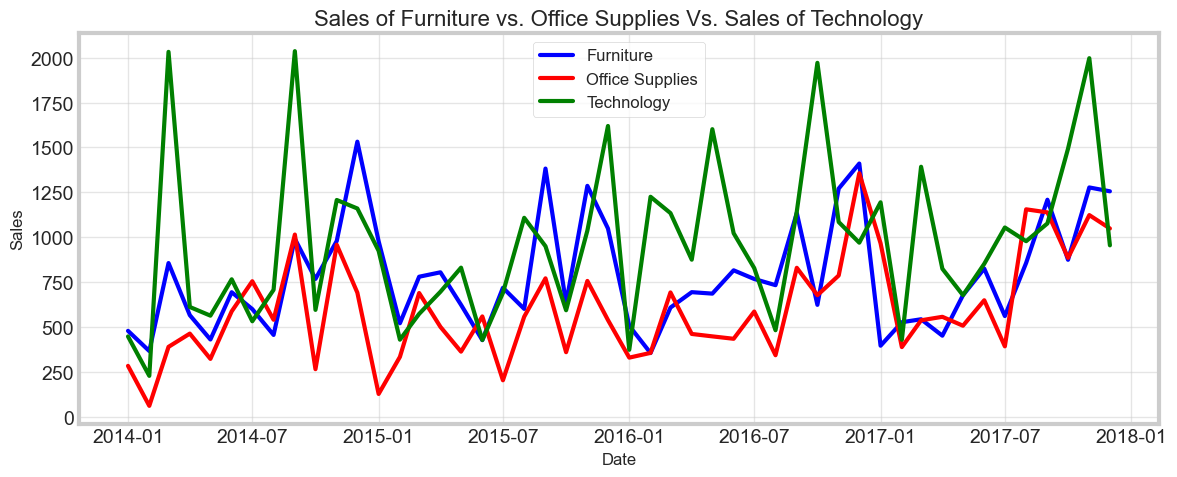

In [40]:
# Set the figure size and style
plt.figure(figsize=(12, 5))

# Define custom colors and line styles
colors = ['blue', 'red', 'green']


# Plot the furniture and office supplies sales
plt.plot(store['Order Date'], store['furniture_sales'], color=colors[0], label='Furniture', linewidth=3)
plt.plot(store['Order Date'], store['office_sales'], color=colors[1], label='Office Supplies', linewidth=3)
plt.plot(store['Order Date'], store['technology_sales'], color=colors[2], label='Technology', linewidth=3)

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales of Furniture vs. Office Supplies Vs. Sales of Technology', fontsize=16)

# Add grid and legend
plt.grid(True, alpha=0.5)
plt.legend(fontsize=12)


# Adjust layout for better readability
plt.tight_layout()

# Display the plot
plt.show()


Over time, there are remarkable disparities in sales among the technology, furniture, and office supplies categories. The technology segment consistently exhibits superior sales figures when compared to both furniture and office supplies. Furthermore, furniture sales consistently outperform office supplies, highlighting a notable distinction in their respective performances.

### Find the first date 

In [41]:
# Find the first date where office sales surpassed furniture sales
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("First date where office sales surpassed furniture sales:", first_date)

First date where office sales surpassed furniture sales: 2014-07-01 00:00:00


In [42]:
# Find the first date where furniture sales surpassed technology sales
first_date = store.loc[np.min(list(np.where(store['furniture_sales'] > store['technology_sales'])[0])), 'Order Date']
print("First date where office sales surpassed furniture sales:", first_date)

First date where office sales surpassed furniture sales: 2014-01-01 00:00:00


In [43]:
# Find the first date where technology sales surpassed furniture sales
first_date = store.loc[np.min(list(np.where(store['technology_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("First date where office sales surpassed furniture sales:", first_date)

First date where office sales surpassed furniture sales: 2014-03-01 00:00:00


## Time Series Modeling with Prophet

In [44]:
# Rename columns for Prophet compatibility 
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology = technology.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Model Creation and Fitting:
# Create separate Prophet models for furniture and office supplies sales
furniture_model = Prophet(interval_width=0.95)
office_model = Prophet(interval_width=0.95)
tech_model = Prophet(interval_width=0.95)

# Fit the models to the respective sales data
furniture_model.fit(furniture)
office_model.fit(office)
tech_model.fit(technology)

# Future Dataframe Creation and Forecasting:
# Create future dataframes for 36 months with monthly frequency for furniture and office supplies sales
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
tech_forecast = tech_model.make_future_dataframe(periods=36, freq='MS')
# Predict the sales for the future periods using the trained models
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.predict(office_forecast)
tech_forecast = tech_model.predict(tech_forecast)

13:57:13 - cmdstanpy - INFO - Chain [1] start processing
13:57:13 - cmdstanpy - INFO - Chain [1] done processing
13:57:13 - cmdstanpy - INFO - Chain [1] start processing
13:57:14 - cmdstanpy - INFO - Chain [1] done processing
13:57:14 - cmdstanpy - INFO - Chain [1] start processing
13:57:14 - cmdstanpy - INFO - Chain [1] done processing


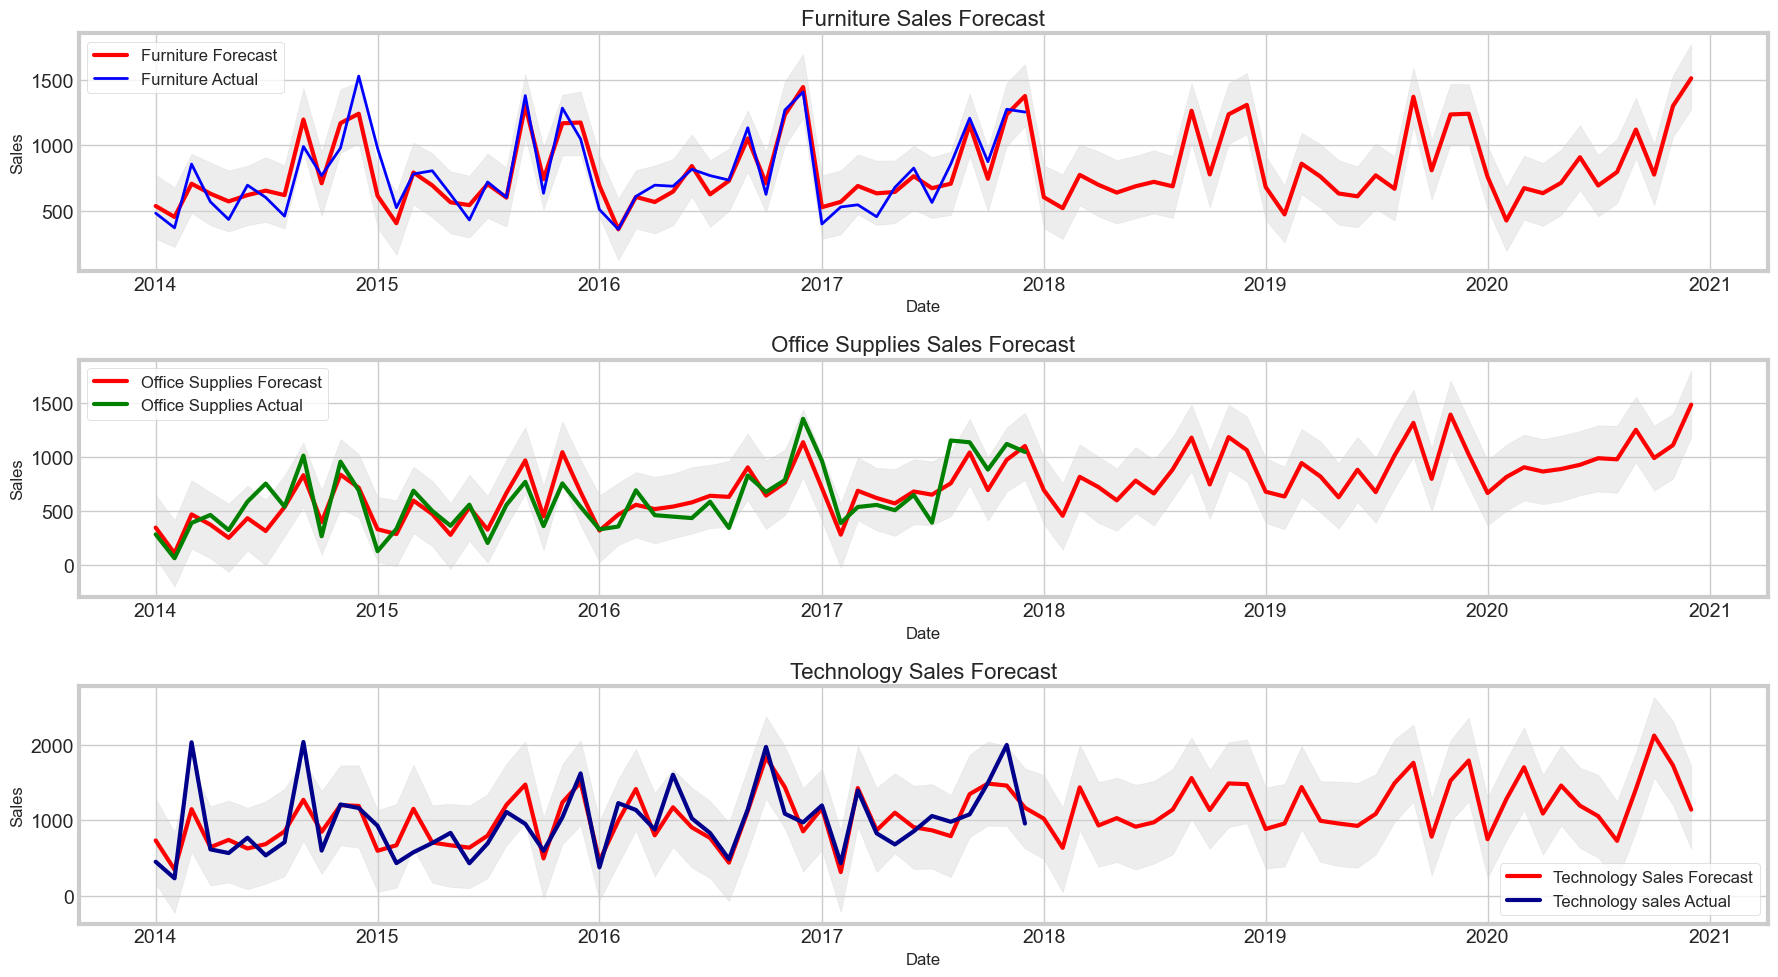

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(18, 10))

# Plot for furniture sales
axes[0].plot(furniture_forecast['ds'], furniture_forecast['yhat'], 'red', label='Furniture Forecast', linewidth=3)
axes[0].plot(furniture['ds'], furniture['y'], 'blue', label='Furniture Actual', linewidth=2)
axes[0].fill_between(furniture_forecast['ds'], furniture_forecast['yhat_lower'], furniture_forecast['yhat_upper'], alpha=0.4, color='lightgray')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Sales', fontsize=12)
axes[0].set_title('Furniture Sales Forecast', fontsize=16)
axes[0].legend(fontsize=12)

# Plot for office supplies sales
axes[1].plot(office_forecast['ds'], office_forecast['yhat'], 'red', label='Office Supplies Forecast', linewidth=3)
axes[1].plot(office['ds'], office['y'], 'green', label='Office Supplies Actual', linewidth=3)
axes[1].fill_between(office_forecast['ds'], office_forecast['yhat_lower'], office_forecast['yhat_upper'], alpha=0.4, color='lightgray')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Sales', fontsize=12)
axes[1].set_title('Office Supplies Sales Forecast', fontsize=16)
axes[1].legend(fontsize=12)

# Plot for technology sales
axes[2].plot(tech_forecast['ds'], tech_forecast['yhat'], 'red', label='Technology Sales Forecast', linewidth=3)
axes[2].plot(technology['ds'], technology['y'], 'darkblue', label='Technology sales Actual', linewidth=3)
axes[2].fill_between(tech_forecast['ds'], tech_forecast['yhat_lower'], tech_forecast['yhat_upper'], alpha=0.4, color='lightgray')
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Sales', fontsize=12)
axes[2].set_title('Technology Sales Forecast', fontsize=16)
axes[2].legend(fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Display the combined subplot
plt.show()


In [46]:
# Calculate evaluation metrics for furniture forecast
furniture_actual = furniture['y']
furniture_predicted = furniture_forecast['yhat'][:len(furniture_actual)]
furniture_mae = mean_absolute_error(furniture_actual, furniture_predicted)
furniture_mse = mean_squared_error(furniture_actual, furniture_predicted)
furniture_rmse = np.sqrt(furniture_mse)
furniture_mape = np.mean(np.abs((furniture_actual - furniture_predicted) / furniture_actual)) * 100

# Calculate evaluation metrics for office supplies forecast
office_actual = office['y']
office_predicted = office_forecast['yhat'][:len(office_actual)]
office_mae = mean_absolute_error(office_actual, office_predicted)
office_mse = mean_squared_error(office_actual, office_predicted)
office_rmse = np.sqrt(office_mse)
office_mape = np.mean(np.abs((office_actual - office_predicted) / office_actual)) * 100

# Calculate evaluation metrics for office supplies forecast
tech_actual = technology['y']
tech_predicted = tech_forecast['yhat'][:len(tech_actual)]
tech_mae = mean_absolute_error(tech_actual, tech_predicted)
tech_mse = mean_squared_error(tech_actual, tech_predicted)
tech_rmse = np.sqrt(tech_mse)
tech_mape = np.mean(np.abs((tech_actual - tech_predicted) / tech_actual)) * 100


# Print the evaluation metrics
print("Furniture Forecast Evaluation Metrics:")
print("Mean Absolute Error (MAE):", furniture_mae)
print("Mean Squared Error (MSE):", furniture_mse)
print("Root Mean Squared Error (RMSE):", furniture_rmse)
print("Mean Absolute Percentage Error (MAPE):", furniture_mape)
print('------------------------------------')

print("Office Supplies Forecast Evaluation Metrics:")
print("Mean Absolute Error (MAE):", office_mae)
print("Mean Squared Error (MSE):", office_mse)
print("Root Mean Squared Error (RMSE):", office_rmse)
print("Mean Absolute Percentage Error (MAPE):", office_mape)
print('------------------------------------')

print("Technology Sales Forecast Evaluation Metrics:")
print("Mean Absolute Error (MAE):", tech_mae)
print("Mean Squared Error (MSE):", tech_mse)
print("Root Mean Squared Error (RMSE):", tech_rmse)
print("Mean Absolute Percentage Error (MAPE):", tech_mape)


Furniture Forecast Evaluation Metrics:
Mean Absolute Error (MAE): 98.36656457223818
Mean Squared Error (MSE): 14965.975873440737
Root Mean Squared Error (RMSE): 122.33550536716942
Mean Absolute Percentage Error (MAPE): 14.015809051523256
------------------------------------
Office Supplies Forecast Evaluation Metrics:
Mean Absolute Error (MAE): 122.82723018032546
Mean Squared Error (MSE): 24019.357246592885
Root Mean Squared Error (RMSE): 154.98179650072743
Mean Absolute Percentage Error (MAPE): 25.88539675758238
------------------------------------
Technology Sales Forecast Evaluation Metrics:
Mean Absolute Error (MAE): 201.994760186732
Mean Squared Error (MSE): 77626.80857540369
Root Mean Squared Error (RMSE): 278.6158799770819
Mean Absolute Percentage Error (MAPE): 23.42085897624604


In general, lower values for MAE, MSE, and RMSE indicate better forecasting accuracy, while a lower MAPE suggests a better percentage prediction. Based on the metrics, it appears that the "Furniture" category has the best overall performance, followed by the "Technology Sales" category, and then the "Office Supplies" category, which has the highest errors and percentage errors.

### Forecast Visualization

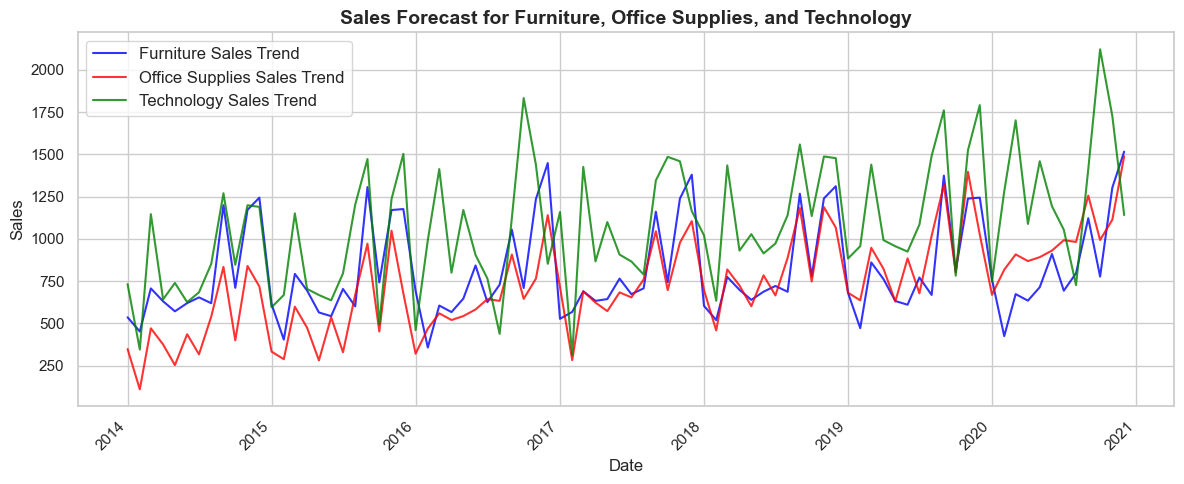

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up Seaborn plot style
sns.set(style="whitegrid", palette="colorblind")

# Create the figure and axes
plt.figure(figsize=(12, 5))
ax = plt.gca()

# Plot furniture, office supplies, and technology sales trends
plt.plot(furniture_forecast['ds'], furniture_forecast['yhat'], 'blue', label='Furniture Sales Trend', alpha = 0.8)
plt.plot(office_forecast['ds'], office_forecast['yhat'], 'red', label='Office Supplies Sales Trend', alpha = 0.8)
plt.plot(tech_forecast['ds'], tech_forecast['yhat'], 'green', label='Technology Sales Trend', alpha = 0.8)



# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales Forecast for Furniture, Office Supplies, and Technology', fontsize=14, fontweight='bold')

# Add legend and set legend fontsize
plt.legend(fontsize=12)

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Trends and Patterns

In [49]:
def plot_components_forecast(model, forecast, title):
    
    components_fig = model.plot_components(forecast)
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    
    plt.tight_layout()

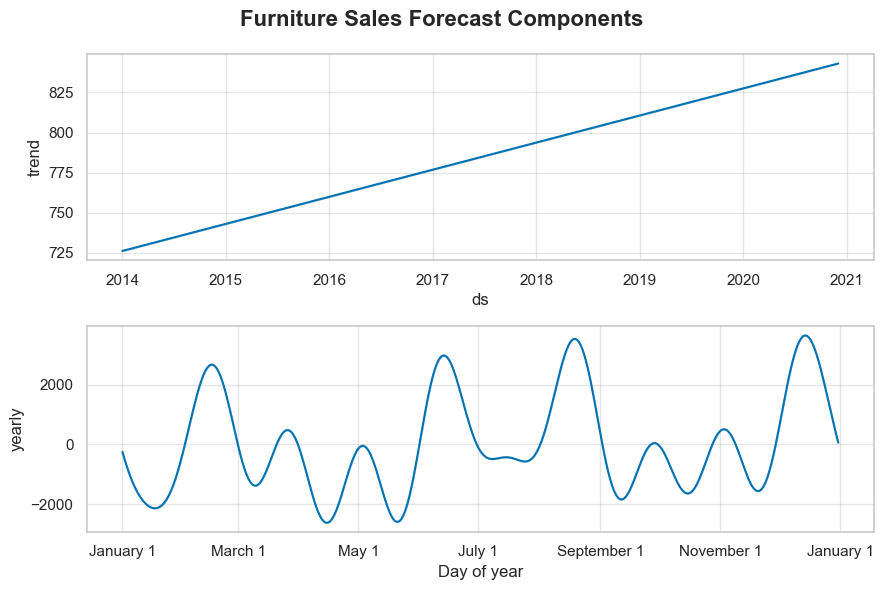

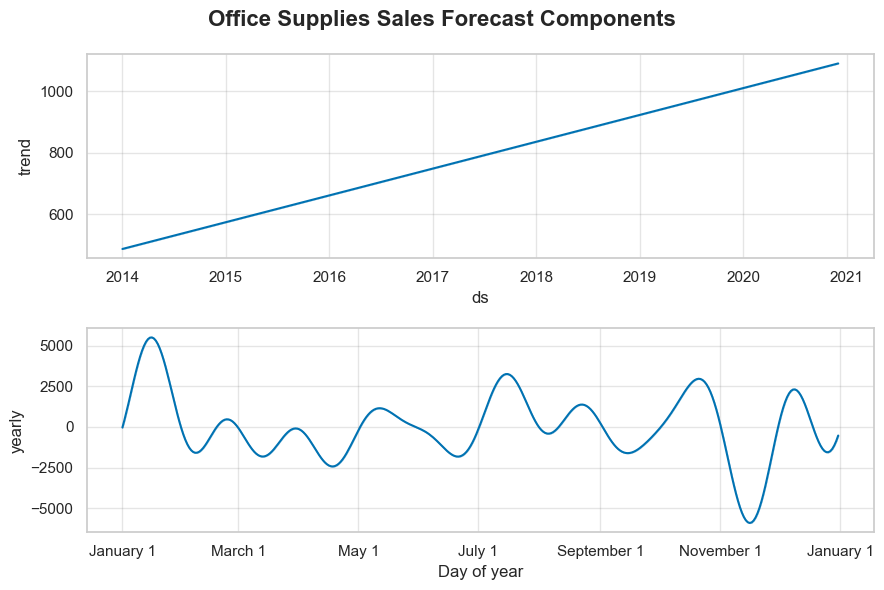

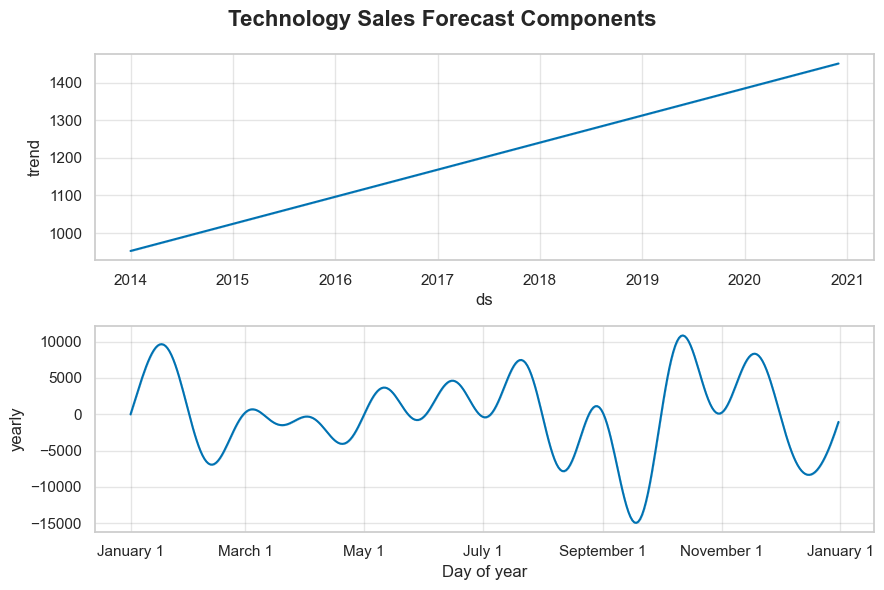

In [50]:
# Plot components of the forecasts for furniture, office supplies, and technology sales with titles
plot_components_forecast(furniture_model, furniture_forecast, title='Furniture Sales Forecast Components')
plot_components_forecast(office_model, office_forecast, title='Office Supplies Sales Forecast Components')
plot_components_forecast(tech_model, tech_forecast, title='Technology Sales Forecast Components')